In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR_train = r'C:\SCHOOL\1015\1015 Project\archive\chest_xray\train'
CATAGORIES = ["NORMAL", "PNEUMONIA"]

In [7]:
IMG_SIZE = 75

train = []

def create_training_data_train():
    for catagories in CATAGORIES:
        path = os.path.join(DATADIR_train, catagories) #path to normal or pneumonia dir
        class_num = CATAGORIES.index(catagories)
        for img in os.listdir(path): #iterate over each image
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) #convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) # resize to normalize data size
                train.append([new_array, class_num]) # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))
          

create_training_data_train()

In [8]:
import random

random.shuffle(train)

In [9]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix


In [10]:
DATADIR_test = r'C:\SCHOOL\1015\1015 Project\archive\chest_xray\test'
CATAGORIES = ["NORMAL", "PNEUMONIA"]

for catagories in CATAGORIES:
    path = os.path.join(DATADIR_test, catagories) #path to normal or pneumonia dir
    for img in os.listdir(path): #iterate over each image
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) #convert to array
        break
    break

test = []

def create_training_data_test():
    for catagories in CATAGORIES:
        path = os.path.join(DATADIR_test, catagories) #path to normal or pneumonia dir
        class_num = CATAGORIES.index(catagories)
        for img in os.listdir(path): #iterate over each image
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) #convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) # resize to normalize data size
                test.append([new_array, class_num]) # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data_test()


<Axes: xlabel='count'>

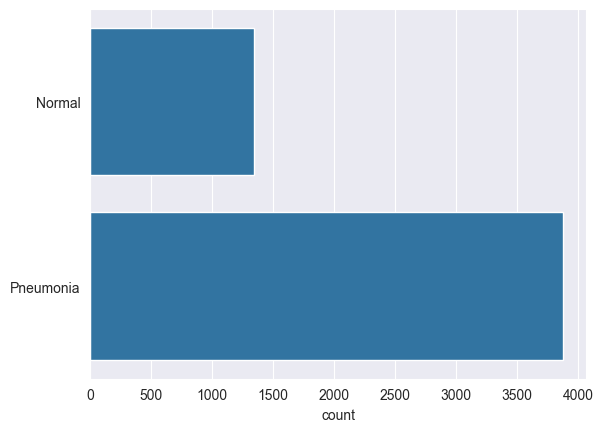

In [11]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Normal")
    else:
        l.append("Pneumonia")
sns.set_style('darkgrid')
sns.countplot(l) 

Text(0.5, 1.0, 'O')

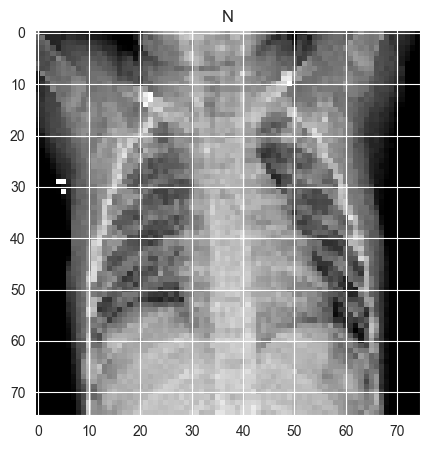

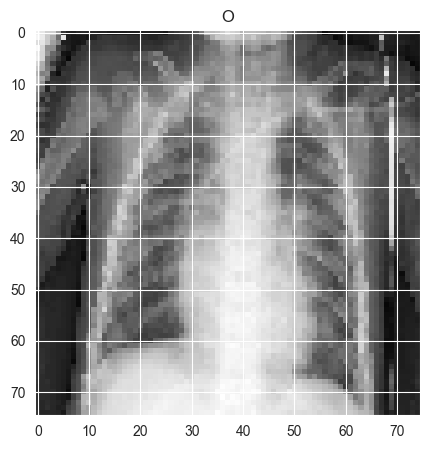

In [12]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(catagories[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(catagories[train[-1][1]])

In [13]:

x_train1 = []
y_train1 = []

x_test = []
y_test = []

for feature, label in train:
    x_train1.append(feature)
    y_train1.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)


In [14]:
# Normalize the data
x_train1 = np.array(x_train1) / 255
x_test = np.array(x_test) / 255

In [15]:
# resize data for deep learning 
x_train1 = x_train1.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train1 = np.array(y_train1)

x_test = x_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_test = np.array(y_test)

In [16]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization , Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True, start_from_epoch=5)

# model for non augmented file
model1 = Sequential()

model1.add(Conv2D(256, (3, 3), input_shape=x_train1.shape[1:]))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(256, (3, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model1.add(Dense(64))
model1.add(Activation('relu'))

model1.add(Dense(1))
model1.add(Activation('sigmoid'))

model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history1 = model1.fit(x_train1, y_train1, batch_size=32, epochs=15, validation_split=0.2, callbacks=[early_stopping])





c:\Users\ediso\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/15
131/131 ━━━━━━━━━━━━━━━━━━━━ 79s 594ms/step - accuracy: 0.7341 - loss: 0.5348 - val_accuracy: 0.9521 - val_loss: 0.2340
Epoch 2/15
131/131 ━━━━━━━━━━━━━━━━━━━━ 104s 796ms/step - accuracy: 0.9224 - loss: 0.2507 - val_accuracy: 0.9444 - val_loss: 0.2035
Epoch 3/15
131/131 ━━━━━━━━━━━━━━━━━━━━ 112s 859ms/step - accuracy: 0.9464 - loss: 0.2196 - val_accuracy: 0.9693 - val_loss: 0.1855
Epoch 4/15
131/131 ━━━━━━━━━━━━━━━━━━━━ 114s 872ms/step - accuracy: 0.9607 - loss: 0.1980 - val_accuracy: 0.9693 - val_loss: 0.1797
Epoch 5/15
131/131 ━━━━━━━━━━━━━━━━━━━━ 117s 890ms/step - accuracy: 0.9638 - loss: 0.1871 - val_accuracy: 0.9703 - val_loss: 0.1639
Epoch 6/15
131/131 ━━━━━━━━━━━━━━━━━━━━ 106s 813ms/step - accuracy: 0.9665 - loss: 0.1730 - val_accuracy: 0.9598 - val_loss: 0.1722
Epoch 7/15
131/131 ━━━━━━━━━━━━━━━━━━━━ 122s 933ms/step - accuracy: 0.9590 - loss: 0.1676 - val_accuracy: 0.9674 - val_loss: 0.1541
Epoch 8/15
131/131 ━━━━━━━━━━━━━━━━━━━━ 119s 912ms/step - accuracy: 0.9756 - 

In [17]:
print("Loss of the model is - " , model1.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model1.evaluate(x_test,y_test)[1]*100 , "%")

20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 230ms/step - accuracy: 0.5298 - loss: 3.5253
Loss of the model is -  2.0494141578674316
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 222ms/step - accuracy: 0.5298 - loss: 3.5253
Accuracy of the model is -  74.03846383094788 %


In [18]:
# import os
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# # Count the number of images in NORMAL and PNEUMONIA folders of the training data
# normal_dir = os.path.join(DATADIR_train, 'NORMAL')
# pneumonia_dir = os.path.join(DATADIR_train, 'PNEUMONIA')

# num_normal_images = len(os.listdir(normal_dir))
# num_pneumonia_images = len(os.listdir(pneumonia_dir))

# print("Number of images in NORMAL folder before augmentation:", num_normal_images)
# print("Number of images in PNEUMONIA folder before augmentation:", num_pneumonia_images)

# # Define the ImageDataGenerator for preprocessing and data augmentation
# datagen = ImageDataGenerator(
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest')

# # Load images from the directory
# normal_files = [os.path.join(normal_dir, fname) for fname in os.listdir(normal_dir)]

# # Augment multiple images from the NORMAL class
# for img_path in normal_files:
#     # Load the image and convert it to a numpy array
#     img = load_img(img_path)
#     img = np.expand_dims(img, axis=0)

#     # Generate augmented images for the NORMAL class
#     i = 0
#     for batch in datagen.flow(img, batch_size=1, save_to_dir=normal_dir, save_prefix='aug_normal', save_format='jpeg'):
#         i += 1
#         if i >= 2:  # Generate 2 augmented images per original image
#             break

# # Count the number of images after augmentation
# num_augmented_normal_images = len(os.listdir(normal_dir))
# num_augmented_pneumonia_images = len(os.listdir(pneumonia_dir))

# print("\nNumber of images in NORMAL folder after augmentation:", num_augmented_normal_images)
# print("Number of images in PNEUMONIA folder after augmentation:", num_pneumonia_images) 

Number of images in NORMAL folder before augmentation: 3699
Number of images in PNEUMONIA folder before augmentation: 3875


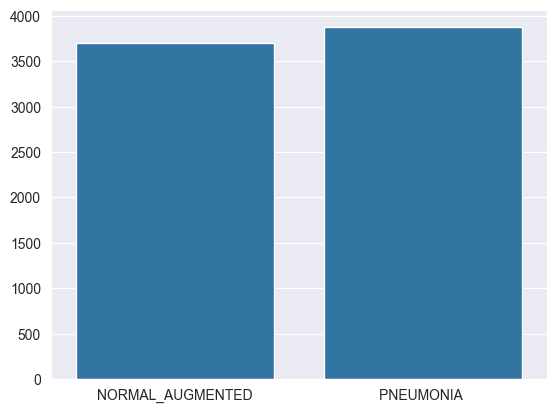

In [19]:
# Count the number of images in NORMAL and PNEUMONIA folders of the training data
normal_dir = os.path.join(DATADIR_train, 'NORMAL_AUGMENTED')
pneumonia_dir = os.path.join(DATADIR_train, 'PNEUMONIA')
num_normal_images = len(os.listdir(normal_dir))
num_pneumonia_images = len(os.listdir(pneumonia_dir))

num_normal_images = len(os.listdir(normal_dir))
num_pneumonia_images = len(os.listdir(pneumonia_dir))

train1 = [num_normal_images, num_pneumonia_images]
categories = ['NORMAL_AUGMENTED', 'PNEUMONIA ']

print("Number of images in NORMAL folder before augmentation:", num_normal_images)
print("Number of images in PNEUMONIA folder before augmentation:", num_pneumonia_images)

sns.barplot(x=categories, y=train1)
plt.show()


<Axes: xlabel='count'>

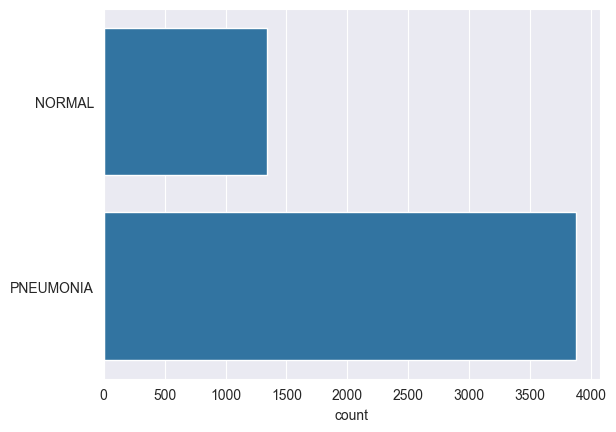

In [20]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("NORMAL")
    else:
        l.append("PNEUMONIA")
sns.set_style('darkgrid')
sns.countplot(l) 

In [21]:
DATADIR_train = r'C:\SCHOOL\1015\1015 Project\archive\chest_xray\train'
CATAGORIES = ["NORMAL_AUGMENTED", "PNEUMONIA"]

atrain = []

def create_training_data_train():
    for catagories in CATAGORIES:
        path = os.path.join(DATADIR_train, catagories) #path to normal or pneumonia dir
        class_num = CATAGORIES.index(catagories)
        for img in os.listdir(path): #iterate over each image
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) #convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) # resize to normalize data size
                atrain.append([new_array, class_num]) # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data_train()

In [22]:
x_train = []
y_train = []

x_test = []
y_test = []

for feature, label in atrain:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)

x_train = np.array(x_train) / 255
y_train = np.array(y_train)

x_test = np.array(x_test) / 255
y_test = np.array(y_test)

x_train = x_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_test = x_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)


In [23]:
model2 = Sequential()

model2.add(Conv2D(256, (3, 3), input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(256, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model2.add(Dense(64))
model2.add(Activation('relu'))

model2.add(Dense(1))
model2.add(Activation('sigmoid'))

model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history2 = model2.fit(x_train, y_train, batch_size=32, epochs=15, validation_split=0.2, callbacks=[early_stopping])


c:\Users\ediso\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/15
190/190 ━━━━━━━━━━━━━━━━━━━━ 150s 783ms/step - accuracy: 0.7653 - loss: 0.4852 - val_accuracy: 0.9624 - val_loss: 0.1002
Epoch 2/15
190/190 ━━━━━━━━━━━━━━━━━━━━ 158s 832ms/step - accuracy: 0.9266 - loss: 0.1876 - val_accuracy: 0.9459 - val_loss: 0.1301
Epoch 3/15
190/190 ━━━━━━━━━━━━━━━━━━━━ 118s 621ms/step - accuracy: 0.9544 - loss: 0.1178 - val_accuracy: 0.8680 - val_loss: 0.3375
Epoch 4/15
190/190 ━━━━━━━━━━━━━━━━━━━━ 123s 649ms/step - accuracy: 0.9582 - loss: 0.1006 - val_accuracy: 0.9109 - val_loss: 0.2189
Epoch 5/15
190/190 ━━━━━━━━━━━━━━━━━━━━ 119s 628ms/step - accuracy: 0.9759 - loss: 0.0662 - val_accuracy: 0.9030 - val_loss: 0.3056
Epoch 6/15
190/190 ━━━━━━━━━━━━━━━━━━━━ 118s 620ms/step - accuracy: 0.9752 - loss: 0.0657 - val_accuracy: 0.9360 - val_loss: 0.1845
Epoch 7/15
190/190 ━━━━━━━━━━━━━━━━━━━━ 121s 636ms/step - accuracy: 0.9872 - loss: 0.0368 - val_accuracy: 0.9063 - val_loss: 0.3290
Epoch 8/15
190/190 ━━━━━━━━━━━━━━━━━━━━ 120s 633ms/step - accuracy: 0.9844 -

In [24]:
print("Loss of the model is - " , model2.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model2.evaluate(x_test,y_test)[1]*100 , "%")

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 172ms/step - accuracy: 0.5916 - loss: 1.3523
Loss of the model is -  0.7853022217750549
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 168ms/step - accuracy: 0.5916 - loss: 1.3523
Accuracy of the model is -  76.76281929016113 %


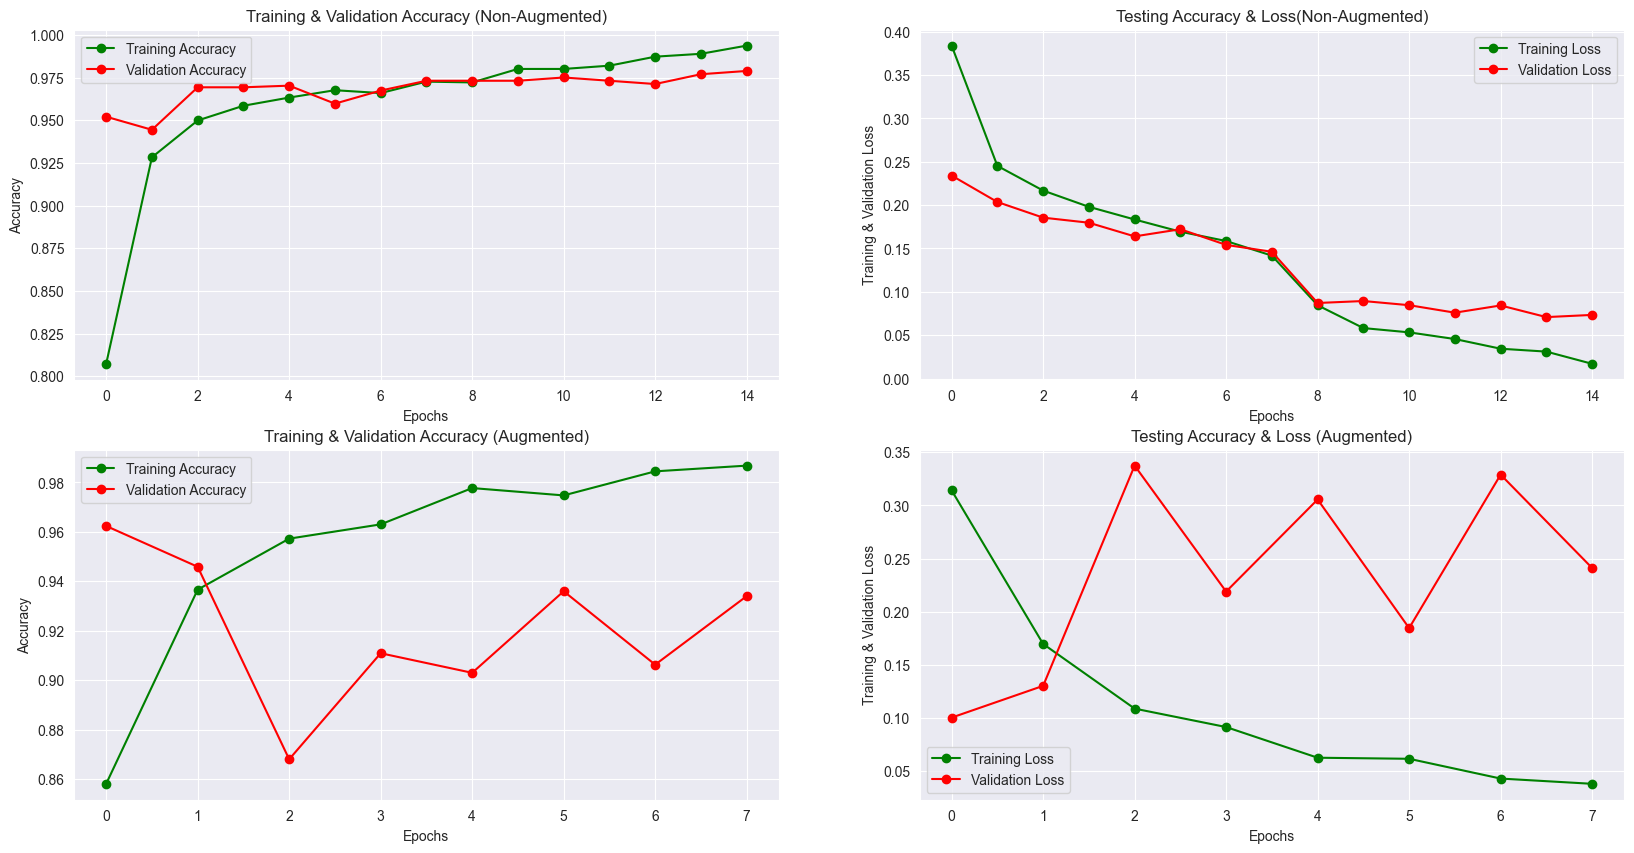

In [26]:
epochs1 = [i for i in range(15)]
fig , ax = plt.subplots(2,2)
train_acc1 = history1.history['accuracy']
train_loss1 = history1.history['loss']
val_acc1 = history1.history['val_accuracy']
val_loss1 = history1.history['val_loss']
fig.set_size_inches(20,10)

ax[0][0].plot(epochs1 , train_acc1 , 'go-' , label = 'Training Accuracy ')
ax[0][0].plot(epochs1, val_acc1 , 'ro-' , label = 'Validation Accuracy')
ax[0][0].set_title('Training & Validation Accuracy (Non-Augmented)')
ax[0][0].legend()
ax[0][0].set_xlabel("Epochs")
ax[0][0].set_ylabel("Accuracy")

ax[0][1].plot(epochs1 , train_loss1 , 'g-o' , label = 'Training Loss')
ax[0][1].plot(epochs1 , val_loss1 , 'r-o' , label = 'Validation Loss')
ax[0][1].set_title('Testing Accuracy & Loss(Non-Augmented)')
ax[0][1].legend()
ax[0][1].set_xlabel("Epochs")
ax[0][1].set_ylabel("Training & Validation Loss")

epochs2 = [i for i in range(8)]
train_acc2 = history2.history['accuracy']
train_loss2 = history2.history['loss']
val_acc2 = history2.history['val_accuracy']
val_loss2 = history2.history['val_loss']

ax[1][0].plot(epochs2 , train_acc2 , 'go-' , label = 'Training Accuracy')
ax[1][0].plot(epochs2 , val_acc2 , 'ro-' , label = 'Validation Accuracy')
ax[1][0].set_title('Training & Validation Accuracy (Augmented)')
ax[1][0].legend()
ax[1][0].set_xlabel("Epochs")
ax[1][0].set_ylabel("Accuracy")

ax[1][1].plot(epochs2 , train_loss2 , 'g-o' , label = 'Training Loss')
ax[1][1].plot(epochs2 , val_loss2 , 'r-o' , label = 'Validation Loss')
ax[1][1].set_title('Testing Accuracy & Loss (Augmented)')
ax[1][1].legend()
ax[1][1].set_xlabel("Epochs")
ax[1][1].set_ylabel("Training & Validation Loss")


plt.show()

In [27]:
# Assuming threshold value of 0.5 (you can adjust this based on your needs)
threshold = 0.1

# Make predictions
predictions1 = model1.predict(x_test)
predictions2 = model2.predict(x_test)

# Apply thresholding to convert predictions to binary
binary_predictions1 = np.where(predictions1 > threshold, 1, 0)
binary_predictions2 = np.where(predictions2 > threshold, 1, 0)

# Reshape if needed
binary_predictions1 = binary_predictions1.reshape(1, -1)[0]
binary_predictions2 = binary_predictions2.reshape(1, -1)[0]

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step


In [50]:
cm1 = confusion_matrix(y_test,binary_predictions1)
cm2 = confusion_matrix(y_test,binary_predictions2)

Non-Augmented: 


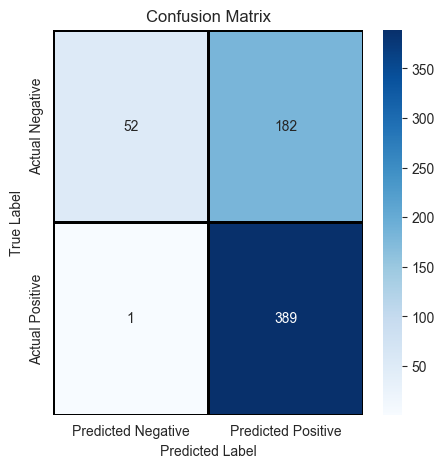

In [51]:
# Assuming cm1 is your confusion matrix
# Rearrange the elements of the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, binary_predictions1).ravel()
rearranged_cm = [[tn, fp], [fn, tp]]

# Plot the rearranged confusion matrix
plt.figure(figsize=(5, 5))
print("Non-Augmented: ")
sns.heatmap(rearranged_cm, cmap="Blues", linecolor='black', linewidth=1, annot=True, fmt='', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [47]:
# Print TP, TN, FP, FN
print("Non-Augmented: ")
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)
print("False Positives (FP):", fp)
print("False Negatives (FN):", fn)
tpr = (tp/(tp+fn))
tnr = (tn/(tn+fp))
print("True Positive Rate (TPR): ", tpr)
print("True Negative Rate (TNR): ", tnr)

Non-Augmented: 
True Positives (TP): 389
True Negatives (TN): 52
False Positives (FP): 182
False Negatives (FN): 1
True Positive Rate (TPR):  0.9974358974358974
True Negative Rate (TNR):  0.2222222222222222


Augmented: 


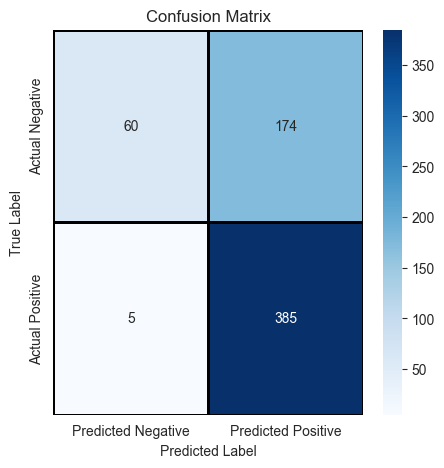

In [49]:
tn1, fp1, fn1, tp1 = confusion_matrix(y_test, binary_predictions2).ravel()
rearranged_cm = [[tn1, fp1], [fn1, tp1]]

# Plot the rearranged confusion matrix
plt.figure(figsize=(5, 5))
print("Augmented: ")
sns.heatmap(rearranged_cm, cmap="Blues", linecolor='black', linewidth=1, annot=True, fmt='', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [33]:
# Print TP, TN, FP, FN
print("Augmented: ")
print("True Positives (TP):", tp1)
print("True Negatives (TN):", tn1)
print("False Positives (FP):", fp1)
print("False Negatives (FN):", fn1)
tpr1 = (tp1/(tp1+fn1))
tnr1 = (tn1/(tn1+fp1))
print("True Positive Rate (TPR): ", tpr1)
print("True Negative Rate (TNR): ", tnr1)

Augmented: 
True Positives (TP): 385
True Negatives (TN): 60
False Positives (FP): 174
False Negatives (FN): 5
True Positive Rate (TPR):  0.9871794871794872
True Negative Rate (TNR):  0.2564102564102564


In [34]:
from sklearn.metrics import accuracy_score

accuracy1 = accuracy_score(y_test, binary_predictions1)
accuracy2 = accuracy_score(y_test, binary_predictions2)

print("Model Accuracy (Non Augmented): {:.4f}".format(accuracy1))
print("Model Accuracy (Augmented): {:.4f}".format(accuracy2))


Model Accuracy (Non Augmented): 0.7067
Model Accuracy (Augmented): 0.7131
